# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 27 : Implementation of UNet Architecture using Pytorch

## Learning Objectives


  At the end of the experiment, you will be able to :

  * understand the Caltech-UCSD_Birds-200 dataset
  * understand and build the Unet model
  * train and evaluate the images using UNet model


### Dataset

We will be using the Caltech-UCSD Birds-200-2011 dataset released by Caltech, it contains around 11,788 images of birds belonging to 200 species along with their masked images.

You can download the image dataset and the segmentations from this [link](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html)

<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Caltech-birds.png" width=900px height=350px/>
</center>
<br><br>

From the above figure, you can see the image of the bird and its mask pair.

The CUB-200–2011 dataset contains images of North American birds from a range of 200 different species. It is a challenging problem as many of the species of birds have degree of visual similarity.

The dataset was originally produced in 2010 (CUB-200), and contained ~6000 images of the 200 classes of birds. Accompanying this was additional label data including bounding boxes, rough segmentations and additional attributes. This was updated in 2011 (CUB-200–2011), to add additional images, bringing the total number of images in the dataset to almost 12,000. The available attributes were also updated to include 15 part locations, 312 binary attributes and a bounding box per image.

**Directory Information**

- CUB_200_2011/images/
    The images organized in subdirectories based on species. See
    IMAGES AND CLASS LABELS section below for more info.
- CUB_200_2011/parts/
    15 part locations per image. See PART LOCATIONS section below
    for more info.
- CUB_200_2011/attributes/
    322 binary attribute labels from MTurk workers. See ATTRIBUTE LABELS
    section below for more info.

**IMAGES AND CLASS LABELS:**

Images are contained in the directory CUB_200_2011/images/, with 200 subdirectories (one for each bird species)

**List of image files (images.txt)**

The list of image file names is contained in the file images.txt, with each line corresponding to one image:

Eg: for the following image 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg


**image_id** - 001

**image_name** - Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg



**Train/test split (train_test_split.txt)**

The suggested train/test split is contained in the file train_test_split.txt, with each line corresponding to one image:

**image_id** - where image_id corresponds to the ID in images.txt

**is_training_image** -  a value of 1 or 0 for is_training_image denotes that the file is in the training or test set, respectively.

**Image class labels (image_class_labels.txt)**

The ground truth class labels (bird species labels) for each image are contained in the file image_class_labels.txt, with each line corresponding to one image:

where image_id and class_id correspond to the IDs in images.txt and classes.txt, respectively.

**BOUNDING BOXES:**

Each image contains a single bounding box label.  Bounding box labels are contained in the file bounding_boxes.txt, with each line corresponding to one image:

where image_id corresponds to the ID in images.txt, and x, y, width, and height are all measured in pixels.

For more details about part locations, attribute labels refer to README file.







Before starting building the model, let's implement the data pipeline from which we get appropriate input for our model.

### Building Data Pipeline

Let's look at some metadata we got and deduced by looking at the downloaded dataset folders.

1. The Bird images and their corresponding mask has the same name but the image is in jpg format and the mask is in png format.

2. Each species is separated into its respective folders, but Caltech researchers were kind enough to provide a text file that contains a list of paths to all the images.

3. There are other metadata such as bounding boxes and classes but we do not need those data to build this model.

4. The Bird images and their segmentations (comes in two separate files)

Here we only consider the images , segmentations and the images.txt file

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2240589" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9886499911" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M3_AST_27_Caltech-UCSD_Birds-200_Image_Segmentation_C" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/CUB_200_2011.zip")
    ipython.magic("sx unzip CUB_200_2011.zip")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/segmentations.zip")
    ipython.magic("sx unzip segmentations.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
import torch
import torchvision
from torch.utils.data import Dataset
import PIL,glob
from PIL import Image
import numpy as np
import pandas as pd
import os
from torch import nn
import torchvision.transforms.functional as TF
from torch.utils.data import DataLoader
from torchvision import transforms, utils
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

### Create the Bird Dataset with Image and Segmentations


First we create a class "BirdDataset" which extends the Pytorch's Dataset class.Following three method need to be overloaded.

**`__init__:`** This method is where the dataset object would be initialized. Usually, you need to build your image file paths (images.txt file that contains all the path to bird images) and corresponding labels (segmentations) which are mask file paths for segmentation. These paths are then used in the **`__len__`** and **`__getitem__`** method.


**`__getitem__:`** This method is called whenever you would use object[index] to access any element. So we need to write the image and mask loading logic here. So in essence, you get one training sample from your dataset using dataset object from this method. we first extracted the image name of the file so that we can append the extension as needed (jpg for images and png for masks) then opened them using PIL, and applied transformations.

**`__len__:`** This method is invoked whenever len(obj) would be used. This method simply returns the number of the training samples in the directory.







In [5]:
class BirdDataset(Dataset):
    def __getitem__(self, index):
        image_name = ".".join(self.images_paths[index].split('.')[:-1])

        # Read the images and the corresponding segmentation from the image.txt
        image = Image.open(os.path.join(self.image_dir, f"{image_name}.jpg")).convert("RGB")
        seg = Image.open(os.path.join(self.segmentation_dir, f"{image_name}.png")).convert("L")

        # Apply transformations on images and the segmentation
        image = self.transform_image(image)
        seg = self.transform_mask(seg)

        return image, seg

    def __init__(self, image_paths, image_dir, segmentation_dir, transform_image, transform_mask):
        super(BirdDataset, self).__init__()
        self.image_dir = image_dir
        self.segmentation_dir = segmentation_dir
        self.transform_image = transform_image
        self.transform_mask = transform_mask
        with open(image_paths, 'r') as f:
            self.images_paths = [line.split(" ")[-1] for line in f.readlines()]

    def __len__(self):
        return len(self.images_paths)

### Data loader creation

Now that we have the dataset class defined, the next step is to create a PyTorch data loader from this. Data loaders allow you to create batches of data samples and labels using multiprocessing. This makes the data loading process much faster and efficient. The DataLoader class available under torch.utils.data is used for this purpose. You create a DataLoader object by passing the dataset object to it.


In [6]:
def load_data_set(image_paths, image_dir, segmentation_dir, transforms, batch_size=8, shuffle=True):
    # Call the BirdDataset class
    dataset = BirdDataset(image_paths,
                          image_dir,
                          segmentation_dir,
                          transform_image=transforms[0],
                          transform_mask=transforms[1])

    # Randomly split the data in to train and the validation
    # Here we are using only 16 images for validating the unet model (you can also increase the size of validation set (80:20 ratio))
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [11772, 16])

    # Load the datasets in the batches
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    return train_dataset, val_dataset, train_loader, val_loader

Pytorch's DataLoader class helps us to create batches and randomly shuffle the data.



### Visualization of Images and the corresponding Segmentations (Masks)

In [7]:
# Preparing the data for visualization
# First we are loading the images.txt which contains the filenames of images and creating a dataframe with paths
df = pd.read_csv('/content/CUB_200_2011/CUB_200_2011/images.txt', header=None)
df.columns = ['path']
df.head()

,path
0,1 001.Black_footed_Albatross/Black_Footed_Alba...
1,2 001.Black_footed_Albatross/Black_Footed_Alba...
2,3 001.Black_footed_Albatross/Black_Footed_Alba...
3,4 001.Black_footed_Albatross/Black_Footed_Alba...
4,5 001.Black_footed_Albatross/Black_Footed_Alba...


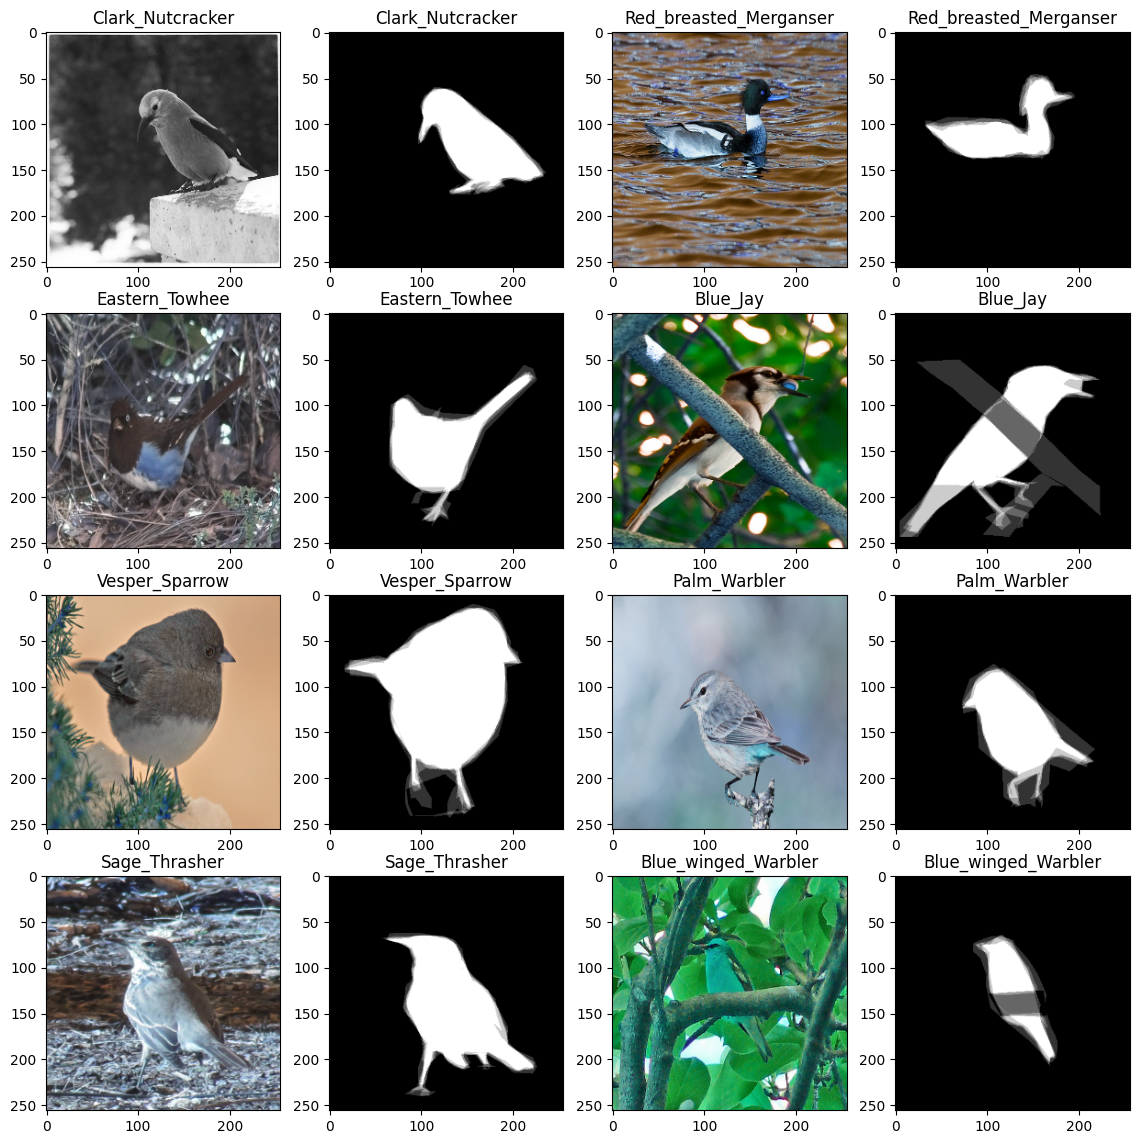

In [8]:
fig = plt.figure(figsize=(14, 14))
# Resize the image to 256x256
dsize = (256, 256)
columns = 4
rows = 4
i = 1
# Plotting the 8 random images and the corresponding segmentations
paths = df.sample(n=8)
for idx,img_id in paths.iterrows():
  img_path = img_id['path'].split(' ')[1]
  # print(img_path)
  # Read the images
  image = cv2.imread(os.path.join('/content/CUB_200_2011/CUB_200_2011/images', img_path))
  # Read the mask iages
  mask =  cv2.imread(os.path.join('/content/segmentations', img_path[:-3]+'png'))
  # Resize the original and the mask images
  image = cv2.resize(image, dsize)
  mask = cv2.resize(mask, dsize)
  ax1 = fig.add_subplot(rows, columns, i)
  i += 1
  ax1.imshow(image)
  plt.title(img_path.split('.')[1].split('/')[0])
  ax1 = fig.add_subplot(rows, columns, i)
  i += 1
  ax1.imshow(mask)
  plt.title(img_path.split('.')[1].split('/')[0])
plt.show()

### Building UNet Architecture

We will be building a UNet model that takes an RGB image and returns a Black and White mask image of the same height and width, exactly like it is in the dataset.

We will follow the below digram of UNet architecture.




<center>
<img src="https://miro.medium.com/max/1200/1*f7YOaE4TWubwaFF7Z1fzNw.png" width=650px height=450px/>
</center>
<br><br>

You can see why this network got this name, it is kind of shaped like the letter "U".

A U-shaped architecture consists of a specific encoder-decoder scheme: The encoder reduces the spatial dimensions in every layer and increases the channels. On the other hand, the decoder increases the spatial dims while reducing the channels. The tensor that is passed in the decoder is usually called **bottleneck**. In the end, the spatial dims are restored to make a prediction for each pixel in the input image. These kinds of models are extremely utilized in real-world applications.

It can also be divided into an encoder-decoder path or contracting-expansive path equivalently.

Encoder (left side): It consists of the repeated application of **two 3x3 convolutions**. Each conv is followed by a ReLU and batch normalization. Then a 2x2 max pooling operation is applied to reduce the spatial dimensions. Again, at each downsampling step, we double the number of feature channels, while we cut in half the spatial dimensions.

Decoder path (right side): Every step in the expansive path consists of an upsampling of the feature map followed by a 2x2 transpose convolution, which halves the number of feature channels. We also have a concatenation with the corresponding feature map from the contracting path, and usually a 3x3 convolutional (each followed by a ReLU). At the final layer, a 1x1 convolution is used to map the channels to the desired number of classes.

We will deal with them one by one, but before that, you can notice that each layer has one thing in common, there is an input layer that is followed by two same convolution layers, which means that the convolution does not change the height and width of the image only the number of channel is changed. So, we will implement that **double convolution module (DoubleConv)**.

Each block takes an input applies two 3X3 convolution layers followed by a 2X2 max pooling. The number of kernels or feature maps after each block doubles so that architecture can learn the complex structures effectively. The bottommost layer mediates between the contraction layer and the expansion layer. It uses two 3X3 CNN layers followed by 2X2 up convolution layer.

For more details refer to the following [link](https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5)

In [9]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernal_size, strides, padding):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernal_size, strides, padding, bias=False),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernal_size, strides, padding, bias=False),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

# In the __init__ method we take in the in_channels which will be 3 in our case.
# And then we need the number of segmentation (which is 1) and a list of features in each layer of upsampling and downsampling.

class UNet(nn.Module):
    def __init__(self, in_channels, num_segmentations=1, features=[64, 128, 256, 512]):
        super(UNet, self).__init__()
        # we declare the module list that will hold the down layers and up layers
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        # Let's also define other layers, bottleneck, max pool and output layer before we start populating the ups and downs list
        self.bottleneck = DoubleConv(
            in_channels=features[-1],
            out_channels=features[-1]*2,
            kernal_size=3,
            strides=1,
            padding=1
        )
        self.output = nn.Conv2d(
            in_channels=features[0],
            out_channels=num_segmentations,
            kernel_size=1
        )
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # For the downward layers, we can just loop through the features and append our DoubleConv module
        # because the first layer will come from the input image or from the previous max pool layer.
        in_channels_iter = in_channels
        for feature in features:
            self.downs.append(DoubleConv(
                    in_channels=in_channels_iter,
                    out_channels=feature,
                    kernal_size=3,
                    strides=1,
                    padding=1
                ))
            in_channels_iter = feature

        # As for the up layers, we will be using a Transpose Convolution layer to upsample the tensors and after that, we will add the DoubleConv layer.
        # But in this case, we have to loop through the feature in reverse order.
        for feature in reversed(features):
            up = nn.Sequential(
                nn.ConvTranspose2d(
                    in_channels=feature*2,
                    out_channels=feature,
                    kernel_size=2,
                    stride=2,
                    padding=0
                ),
                DoubleConv(
                    in_channels=feature*2,
                    out_channels=feature,
                    kernal_size=3,
                    padding=1,
                    strides=1
                )
            )

            self.ups.append(up)

    # First, we send the image down the UNet through Downward layers and we saved the output of DoubleConv before applying the max pool.
    def forward(self, x):
        skip_connections = []
        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)

        # After that, we send in the tensor through the bottleneck layer and prepare the skip_connections to be concatenated with the up layers by reversing it.
        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1]

        for i in range(len(self.ups)):
            x = self.ups[i][0](x) # Pass through ConvTranspose first

            skip_connection = skip_connections[i]

            # If the height and width of output tensor and skip connection
            # is not same then resize the tensor
            if x.shape != skip_connection.shape:
                x = TF.resize(x, size=skip_connection.shape[2:])

            # Concat the output tensor with skip connection
            concat_x = torch.cat((skip_connection, x), dim=1)

            # Pass the concatenated tensor through DoubleConv
            x = self.ups[i][1](concat_x)

        # Pass it through the output layer
        return self.output(x)

#### Next, we'll define the Hyperparameters and configs



In [10]:
config = {
    "lr": 1e-3,
    "batch_size": 16,
    "image_dir": "/content/CUB_200_2011/CUB_200_2011/images",
    "segmentation_dir": "/content/segmentations",
    "image_paths": "/content/CUB_200_2011/CUB_200_2011/images.txt",
    "epochs": 3, # Increase the number of epochs to see the improvement in the predicted images
    "checkpoint": "/content/bird_segmentation_v1.pth",
    "optimiser": "/content/bird_segmentation_v1_optim.pth",
    "continue_train": False,
    "device": "cuda" if torch.cuda.is_available() else "cpu"
}

### Define Transformations

In [11]:
transforms_image = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0., 0., 0.), (1., 1., 1.))
])

transforms_mask = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.,), (1.,))
])

In [12]:
# Call the load_data_set function to get the data loaders and the datasets
train_dataset, val_dataset, train_loader, val_loader = load_data_set(
    config['image_paths'],
    config['image_dir'],
    config['segmentation_dir'],
    transforms=[transforms_image, transforms_mask],
    batch_size=config['batch_size']
)

print("loaded", len(train_loader), "batches")

loaded 736 batches


In [13]:
# Length of the trainset
print(len(train_dataset))

11772


In [14]:
# UNet model
model = UNet(in_channels=3).to(config['device'])

In [15]:
print(model)

UNet(
  (ups): ModuleList(
    (0): Sequential(
      (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
      (1): DoubleConv(
        (conv): Sequential(
          (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (5): ReLU(inplace=True)
        )
      )
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
      (1): DoubleConv(
        (conv): Sequential(
          (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReL

In [16]:
# We can also use the pretrained model
if config['continue_train']:
    state_dict = torch.load(config['checkpoint'])
    optimiser_state = torch.load(config['optimiser'])
    model.load_state_dict(state_dict)
    optimiser.load_state_dict(optimiser_state)

### Defining Loss Function and Optimizer

We will be using the Binary Crossentropy loss because we are dealing with binary segmentation here. And also, we will be using Pytorch's Automated Mixed Precision library to automatically set the precision of the gradients. This will reduce the VRAM consumed and also sped up the learning process.

We need to use BCE with Logits instead of normal BCE error because we are not using a sigmoid in the model architecture. BCE with Logits will pass the tensor through a sigmoid function before calculating the loss.

In case you want to segment more than one items like in a photo you want to segment people, cars, trees, sky, etc. then you can simply change the num_segmentations parameter in the UNet class and change the loss function to Cross-Entropy Loss torch.nn.CrossEntropyLoss.



In [17]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimiser = torch.optim.Adam(params=model.parameters(), lr=config['lr'])
scaler = torch.cuda.amp.GradScaler()
model.train()

UNet(
  (ups): ModuleList(
    (0): Sequential(
      (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
      (1): DoubleConv(
        (conv): Sequential(
          (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (5): ReLU(inplace=True)
        )
      )
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
      (1): DoubleConv(
        (conv): Sequential(
          (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReL

In [18]:
# Create a test directory to save the predictions and the ground truths
!mkdir /content/test
!mkdir test/true

In [19]:
!mkdir test/pred

### Evaluation Metrics - Dice Coefficient

The Dice score is often used to quantify the performance of image segmentation methods. There you annotate some ground truth region in your image and then make an automated algorithm to do it. You validate the algorithm by calculating the Dice score, which is a measure of how similar the objects are. So it is the size of the overlap of the two segmentations divided by the total size of the two objects. Using the same terms as describing accuracy, the Dice score is:

$ = \frac{2 \ . \ number \ of \ true \ positives}{2 \ ⋅ \ number \ of \ true \ positives \ + \ number \ of \ false \ positives \ + \ number \ of \ false \ negatives} $

For a measure of accuracy we will be using Dice Score also know as F1 Score because if we use normal pixel accuracy since 80% of the mask image is black, the model can get an accuracy of 80% just by generating a black screen every time.

The Dice score is not only a measure of how many positives you find, but it also penalizes for the false positives that the method finds, similar to precision. so it is more similar to precision than accuracy. The only difference is the denominator, where you have the total number of positives instead of only the positives that the method finds. So the Dice score is also penalizing for the positives that your algorithm/method could not find.

**For Eg:** In the case of image segmentation, let's say that you have a mask with ground truth, let's call the mask 𝐴. So the mask has values 1 in the pixels where there is something you are trying to find and else zero. Now you have an algorithm to generate image/mask 𝐵, which also has to be a binary image, i.e. you segmentation images (mask). Then we have the following:


*   **Number of positives** is the total number of pixels that have intensity 1 in image 𝐴

*   **Number of true positives** is the total number of pixels which have the value 1 in both 𝐴
and 𝐵. So it the intersection of the regions of ones in 𝐴 and 𝐵. It is the same as using the AND operator on 𝐴 and 𝐵.

*   **Number of false positives** is the number of pixels which appear as 1 in 𝐵 but zero in 𝐴
<br><br>
<center>

   **Dice coefficient = $\frac{2⋅|𝐴∩𝐵|}{|𝐴|+|𝐵|}$**

The idea is simple we count the similar pixels (taking intersection, present in both the images) in the both images we are comparing and multiple it by 2. And divide it by the total pixels in both the images. The below diagrams will make the picture more clear.

<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Dice_Coefficient.png" width=400px height=300px/>
</center>
<br><br>


In [20]:
def check_accuracy_and_save(model, optimiser, epoch):
    # Save the model
    torch.save(model.state_dict(), config['checkpoint'])
    torch.save(optimiser.state_dict(), config['optimiser'])

    num_correct = 0
    num_pixel = 0
    dice_score = 0

    model.eval()
    with torch.no_grad():
        # Loop through the validation datset
        for x, y in val_loader:
            x = x.to(config['device'])
            y = y.to(config['device'])

            # Apply sigmoid to predicted out if not applied earlier
            preds = torch.sigmoid(model(x))

            # For predicted outputs make all values above 0.5 probability as 1 and rest 0
            preds = (preds > 0.5).float()

            # For calculating the Dice Score for every class we multiply the (prediction * target) and divide by the sum of (predictions and target)
            dice_score += (2 * (preds * y).sum()) / (
                (preds + y).sum() + 1e-8
            )

            # torchvision.utils.save_image(preds, f"/content/test/pred/{epoch}.png")
            # torchvision.utils.save_image(y, f"/content/test/true/{epoch}.png")

            # Save the target and the predicted images for each epoch
            for i in range(preds.size(0)):
              torchvision.utils.save_image(preds[i, :, :, :],f"/content/test/pred/{i}.png")
            for i in range(y.size(0)):
              torchvision.utils.save_image(y[i, :, :, :], f"/content/test/true/{i}.png")

    # Print the dice score
    print(f"Dice Score = {dice_score/len(val_loader)}")

    # Visualize the target and the predicted images
    j = 1
    columns = 4
    rows = 8
    fig = plt.figure(figsize=(20, 20))
    for i in glob.glob("/content/test/true/*.png"):
      im = np.array(PIL.Image.open(i))
      mask = np.array(PIL.Image.open("/content/test/pred/"+os.path.basename(i)))
      ax1 = fig.add_subplot(rows, columns, j)
      ax1.imshow(im)
      plt.tight_layout(pad=0.5)
      plt.title(f"{epoch} Ground Truth : {os.path.basename(i)}")
      ax1 = fig.add_subplot(rows, columns, j+1)
      ax1.imshow(mask)
      plt.title(f"{epoch} Predicted Mask : {os.path.basename(i)}")
      j += 2

### Training the UNet model


In the train function, we create two loops one for epochs and the other for the batches. We use the autocast wrapper to automatically cast the gradients to float16 or float32 as required and we just update the weights using Pytorch abstraction.

For 3 epochs the training takes around 1hr to complete the execution and also to see the better results try increasing the number of epochs.



100%|██████████| 736/736 [06:12<00:00,  1.97it/s, loss=0.183]


Dice Score = 0.6842657327651978


100%|██████████| 736/736 [06:00<00:00,  2.04it/s, loss=0.174]


Dice Score = 0.780133843421936


100%|██████████| 736/736 [06:00<00:00,  2.04it/s, loss=0.0748]


Dice Score = 0.7801559567451477


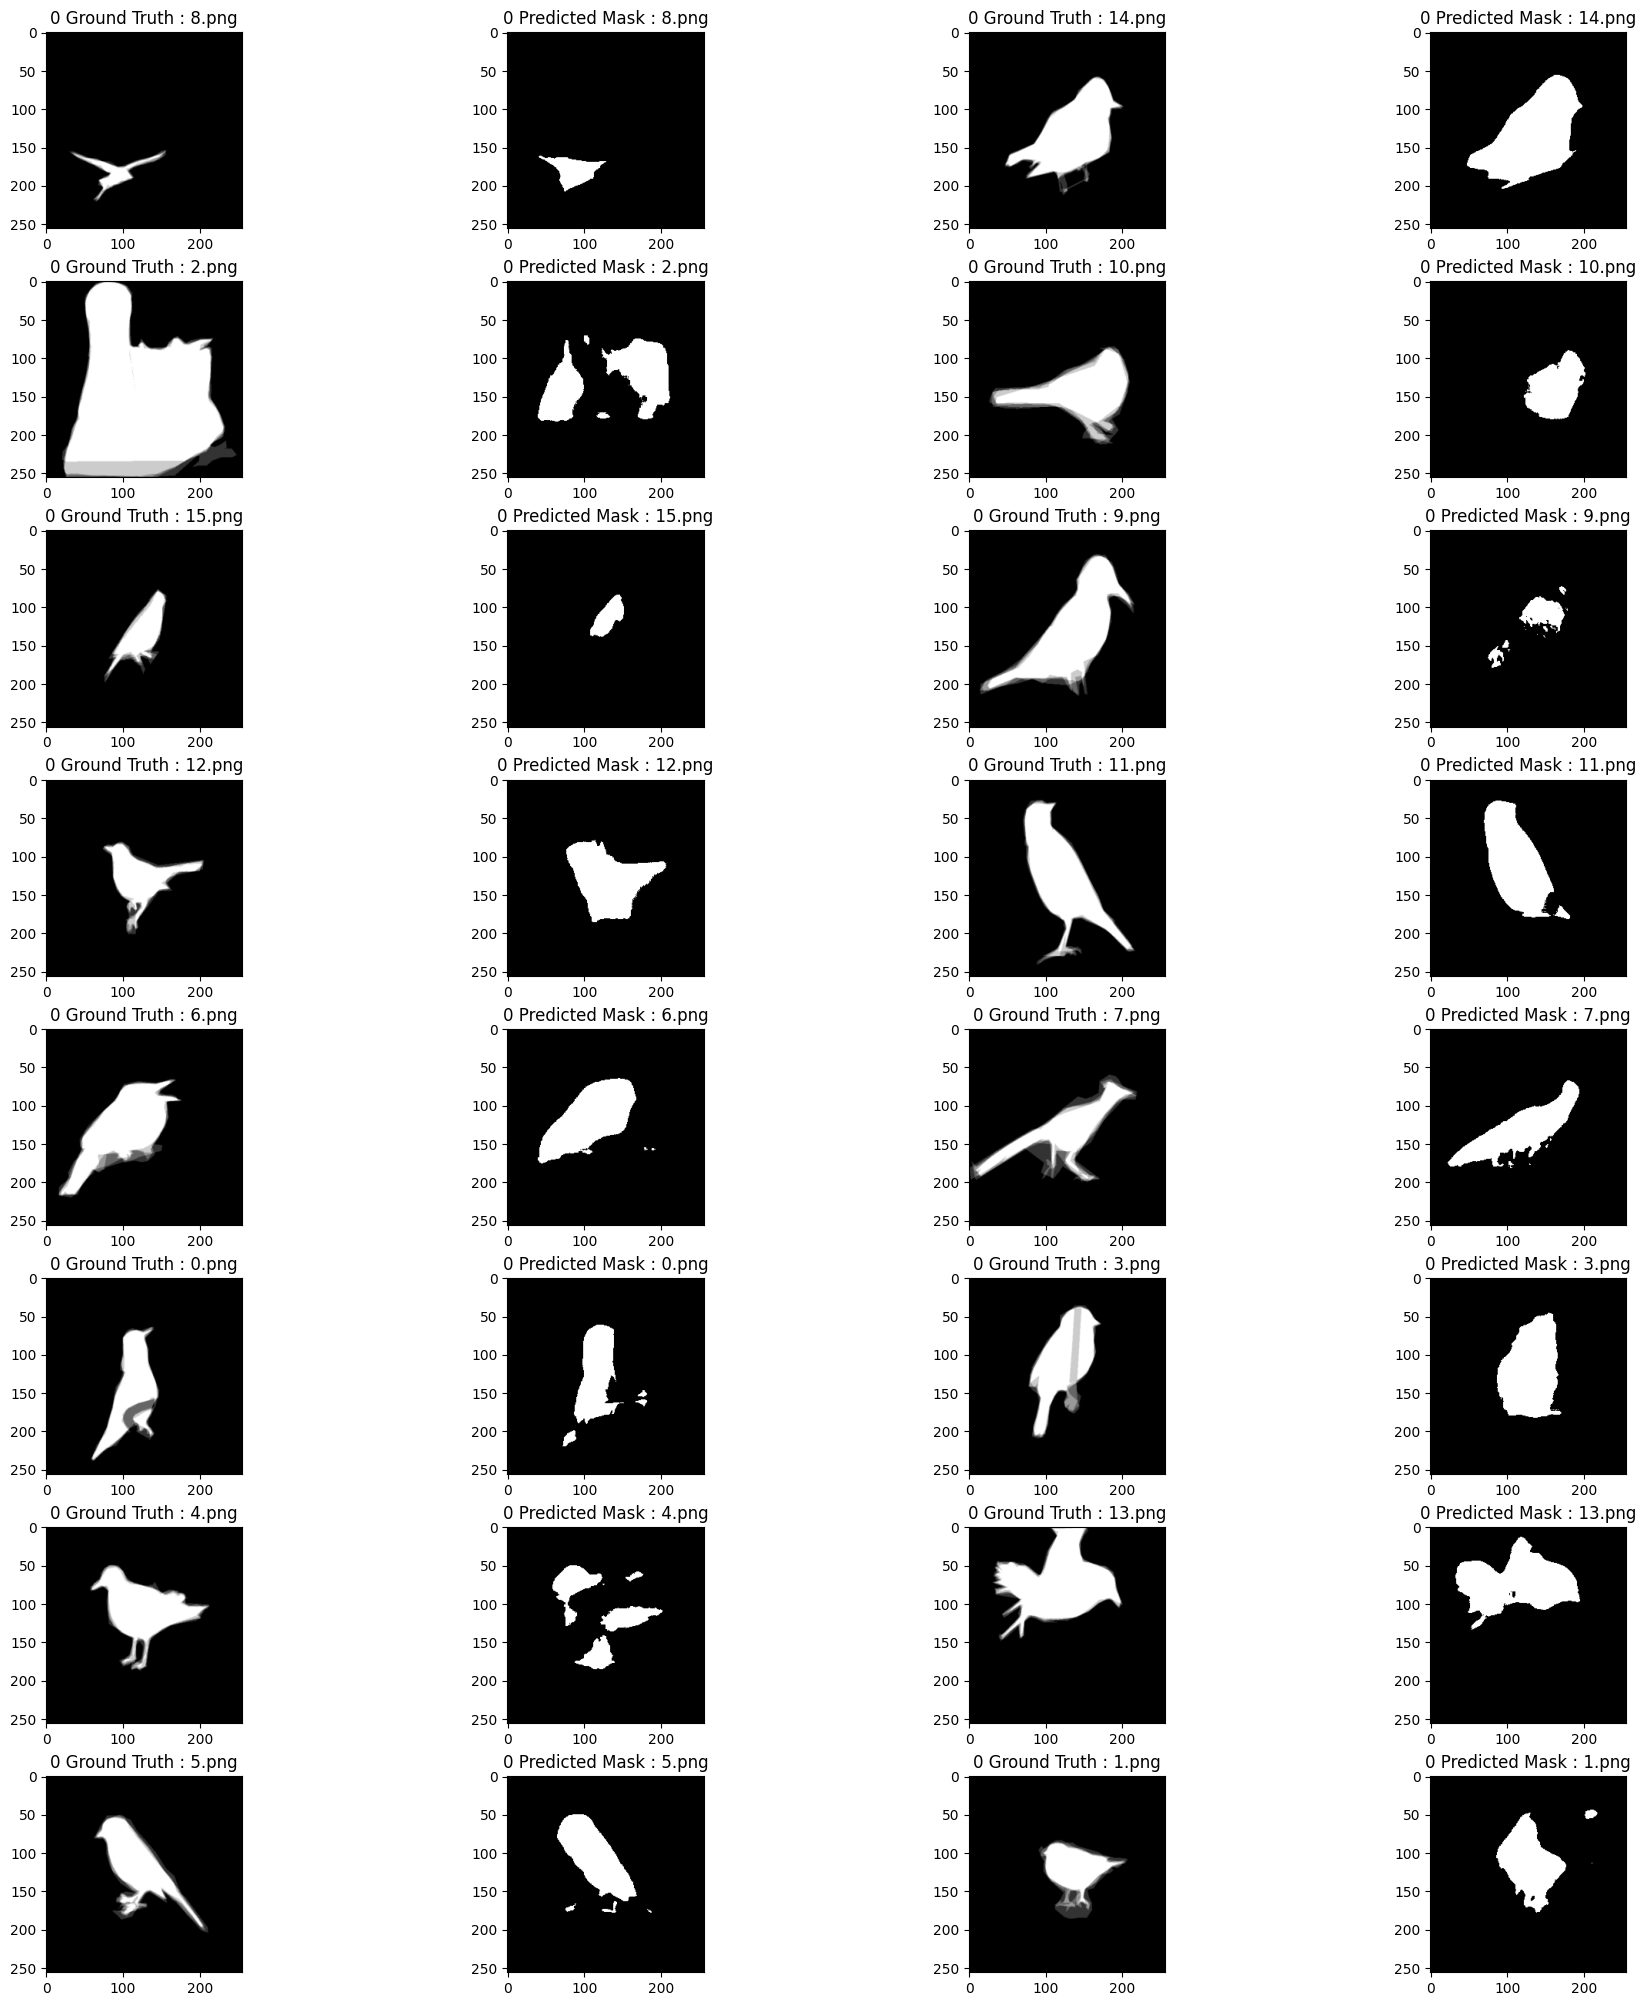

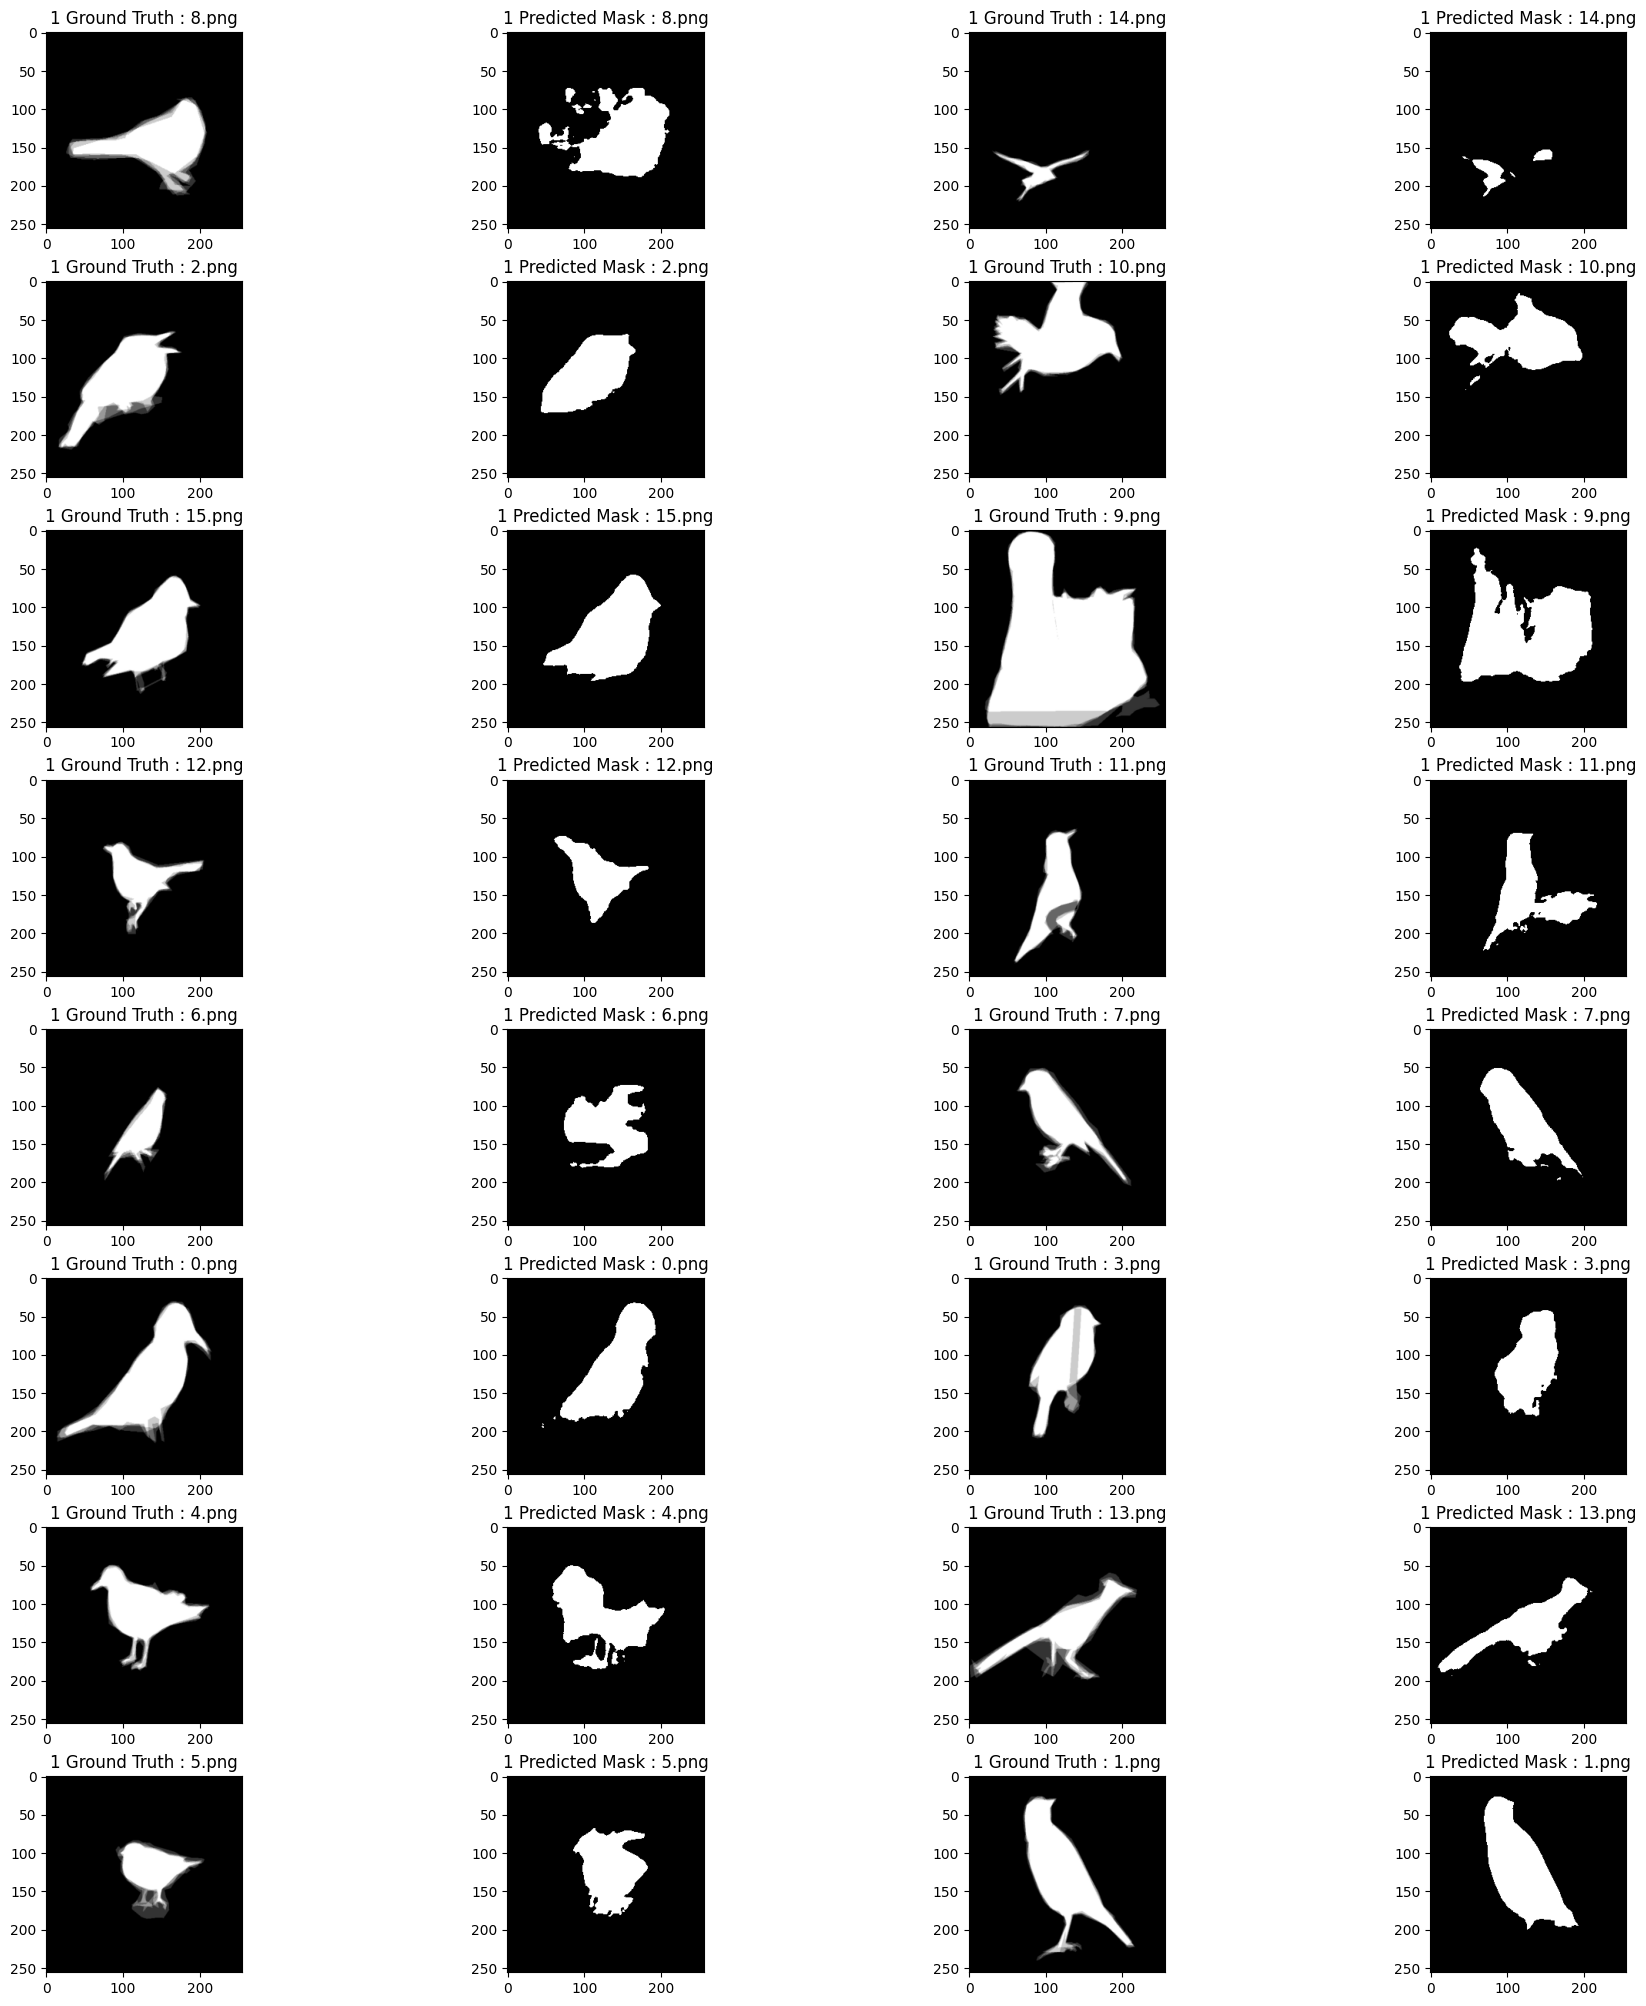

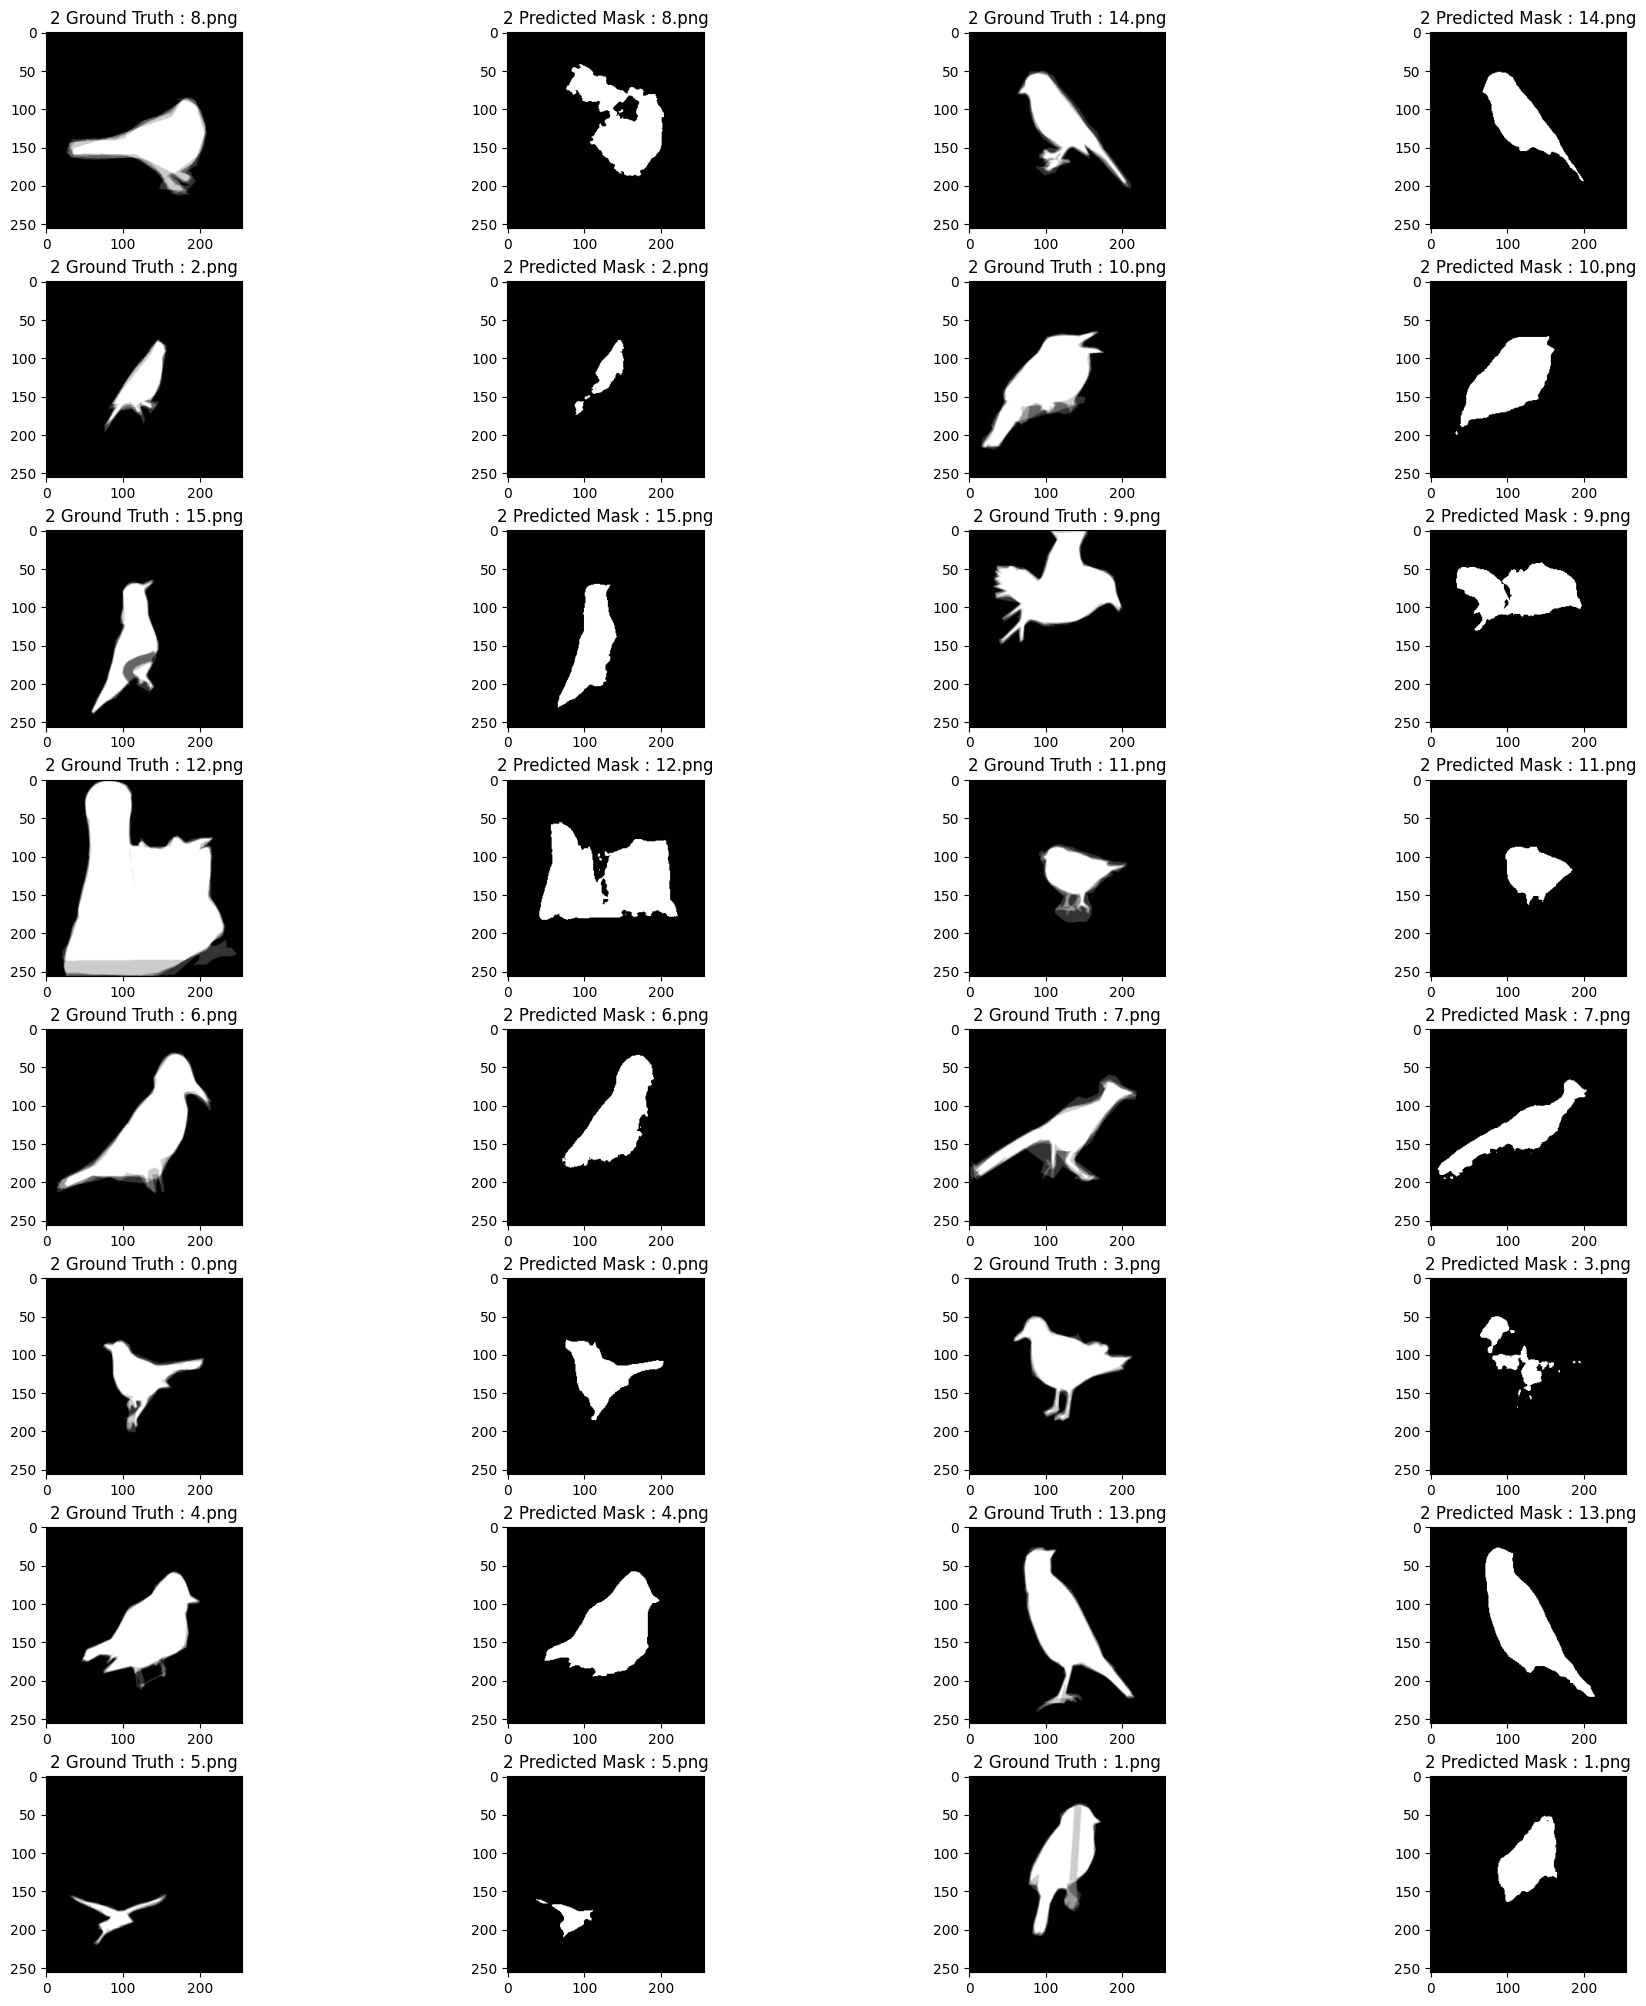

In [21]:
def train():
    step = 0
    for epoch in range(config['epochs']):

        # Loop through the train dataset
        loop = tqdm(train_loader)

        for image, seg in loop:
            # Get the image and the corresponding mask
            image = image.to(config['device'])
            seg = seg.float().to(config['device'])

            with torch.cuda.amp.autocast():
                # Do the forward pass
                # Get the predictions from the model
                pred = model(image)
                # Compute the loss between the target and the predictions
                loss = loss_fn(pred, seg)

            # Zero out the gradients
            optimiser.zero_grad()

            # Scales loss. Calls backward() on scaled loss to create scaled gradients.
            # Backward ops run in the same dtype autocast chose for corresponding forward ops
            scaler.scale(loss).backward()

            # scaler.step() first unscales the gradients of the optimizer's assigned params.
            # If these gradients do not contain infs or NaNs, optimizer.step() is then called
            # otherwise, optimizer.step() is skipped
            scaler.step(optimiser)

            # Updates the scale for next iteration.
            scaler.update()

            loop.set_postfix(loss=loss.item())
            step += 1
        # Call the above function and plot the predicted and the ground truth masks
        check_accuracy_and_save(model, optimiser, epoch)

if __name__ == "__main__":
    train()

### Please answer the questions below to complete the experiment:




In [22]:
#@title Q.1. Which of the following is true for semantic segmentation?
Answer1 = "All of the above" #@param ["","Semantic Segmentation can be considered as pixel wise classification problem i.e., a class label is supposed to be assigned to each pixel", "Semantic segmentation is not limited to two categories. The number of categories for classifying the content of the image can be changed.", "It has applications in Autonomous driving (for identifying a drivable path for cars by separating the road from obstacles like pedestrians), Industrial inspection, Medical imaging analysis", "All of the above"]


#### Consider the following statements about U-Net and answer Q2.

A. A U-Net is a fully convolutional neural network architecture that was developed for biomedical image segmentation.

B. The loss function for U-Net is a pixel-wise softmax with cross entropy.

C. U-Nets have been found to be very effective for tasks where the output is of similar size as the input and the output needs that amount of spatial resolution, and this makes them very good for creating segmentation masks.

D. The network architecture of a U-NET consists of a contracting path and an expansive path and in total the network has 23 convolutional layers.

In [23]:
#@title Q.2. Which of the above statements is/are True regarding U-Net?
Answer2 = "Both C and D" #@param ["","Only A", "Only C", "Only D", "Both A and B","Both C and D", "Both B and D", "A, B, C and D"]


In [24]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [25]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}


In [26]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [27]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2334
Date of submission:  13 Jan 2024
Time of submission:  15:46:13
View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions
